In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Mounting the Google Drive (for Google Colab Users)
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the Dataset
# Data Loading and Overview
df_train = pd.read_csv('/content/drive/MyDrive/loan-train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/loan-test.csv')
print("Training Data Shape:", df_train.shape)
print("Testing Data Shape:", df_test.shape)


Training Data Shape: (614, 13)
Testing Data Shape: (367, 12)


In [ ]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


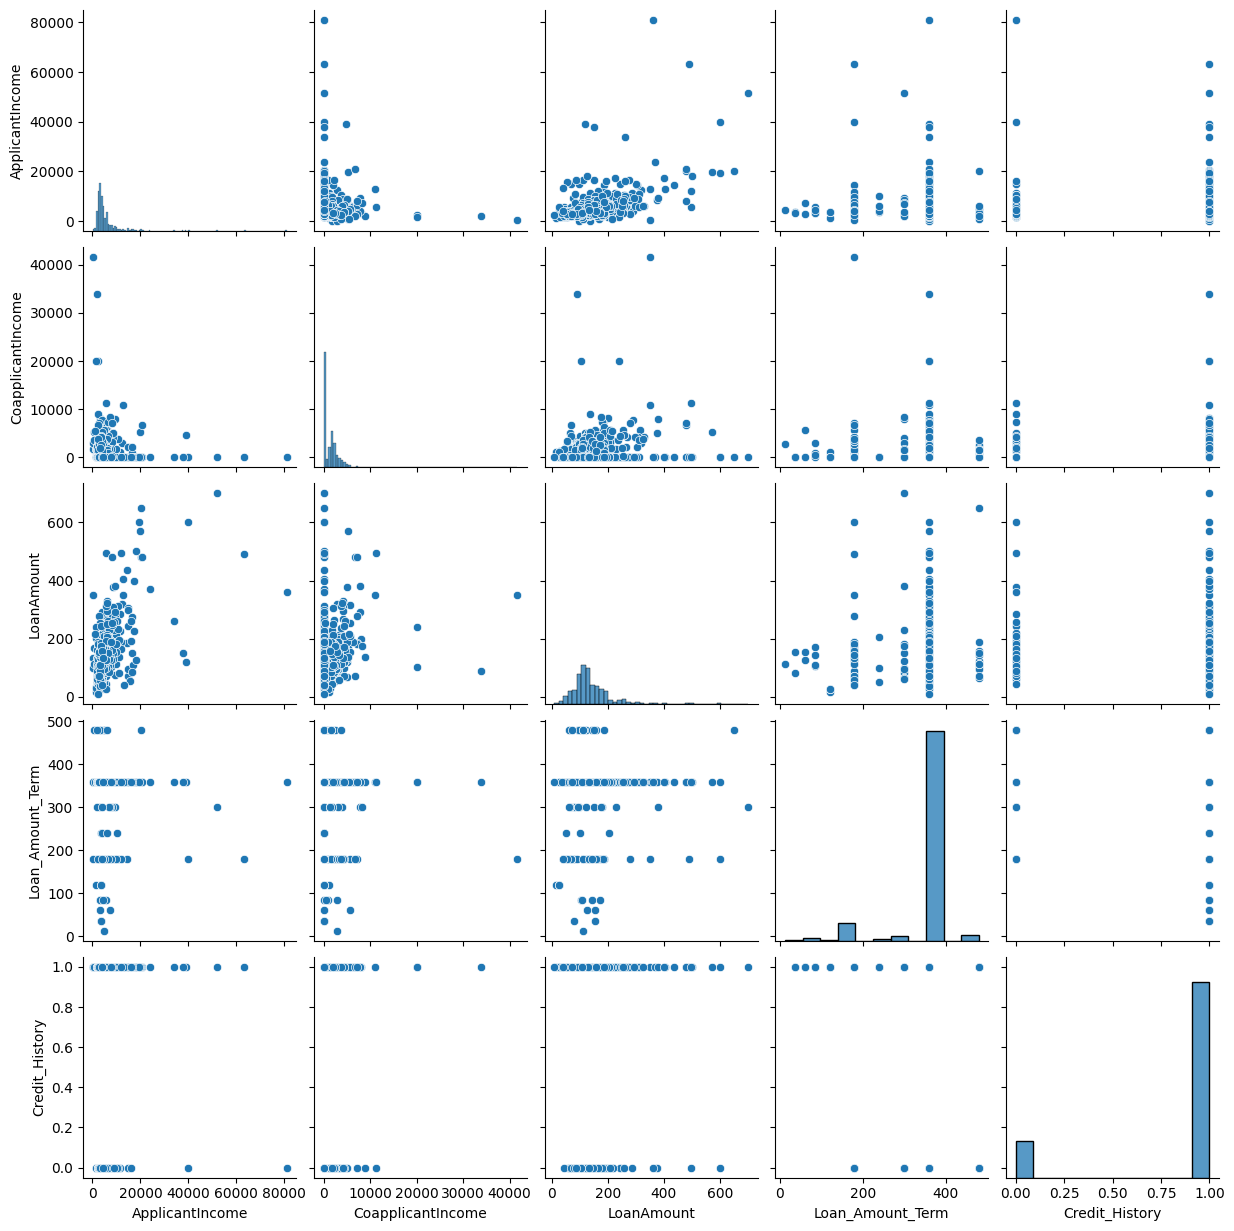

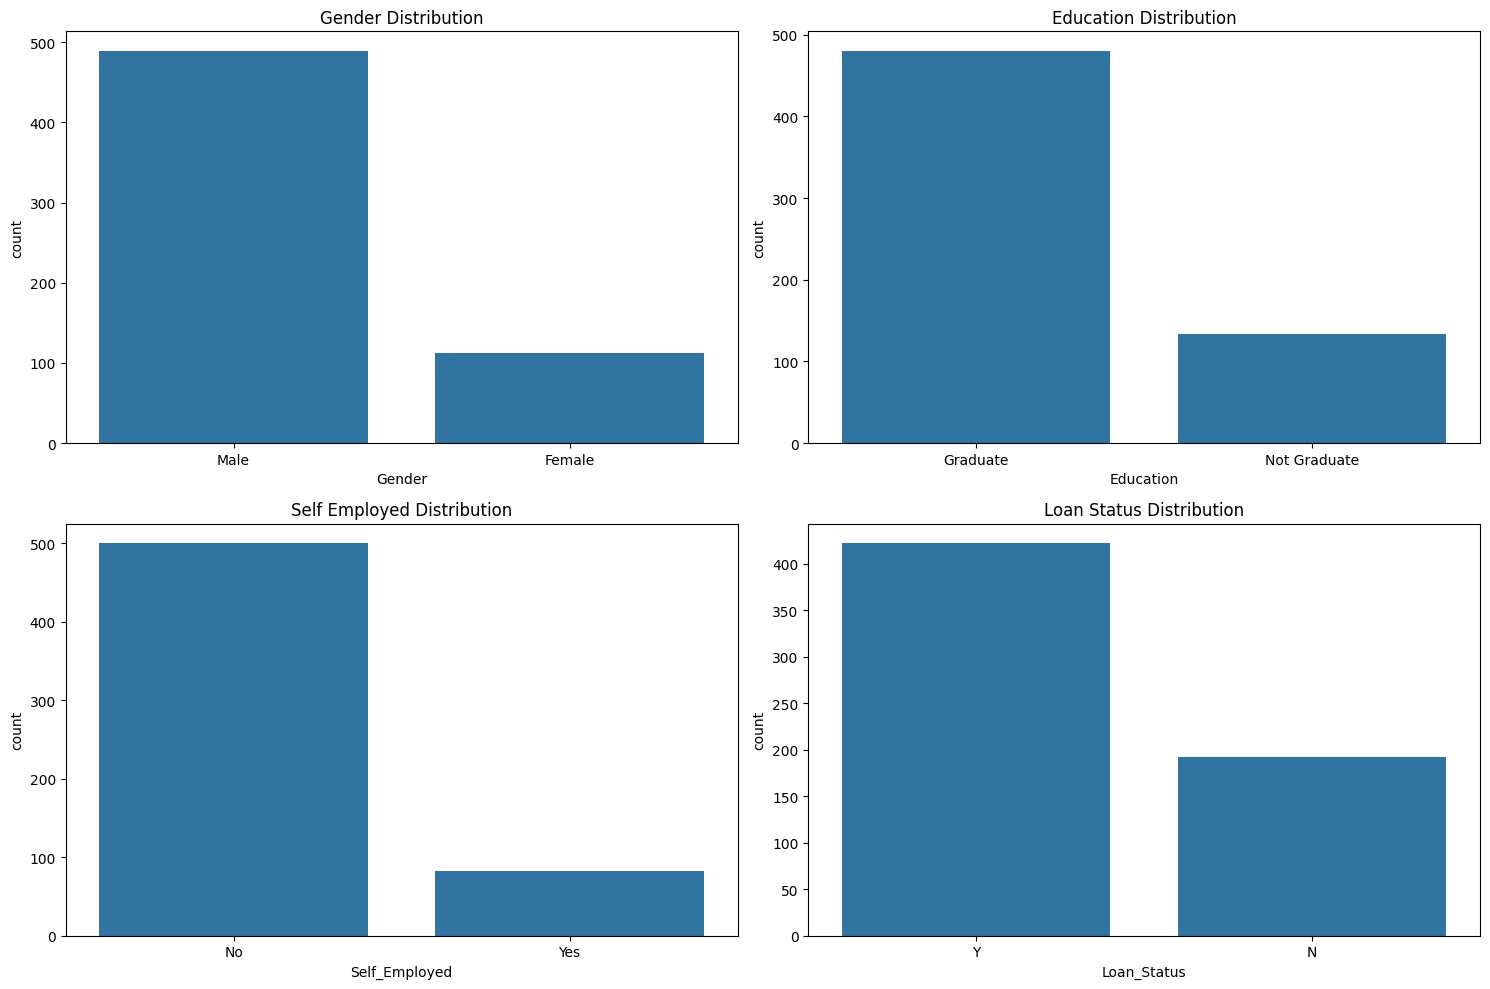

In [ ]:
# Exploratory Data Analysis (EDA)
# Pairplot for numerical variables
sns.pairplot(df_train)
plt.show()

# Count plots for categorical variables
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Gender', data=df_train)
plt.title('Gender Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x='Education', data=df_train)
plt.title('Education Distribution')

plt.subplot(2, 2, 3)
sns.countplot(x='Self_Employed', data=df_train)
plt.title('Self Employed Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x='Loan_Status', data=df_train)
plt.title('Loan Status Distribution')
plt.tight_layout()
plt.show()

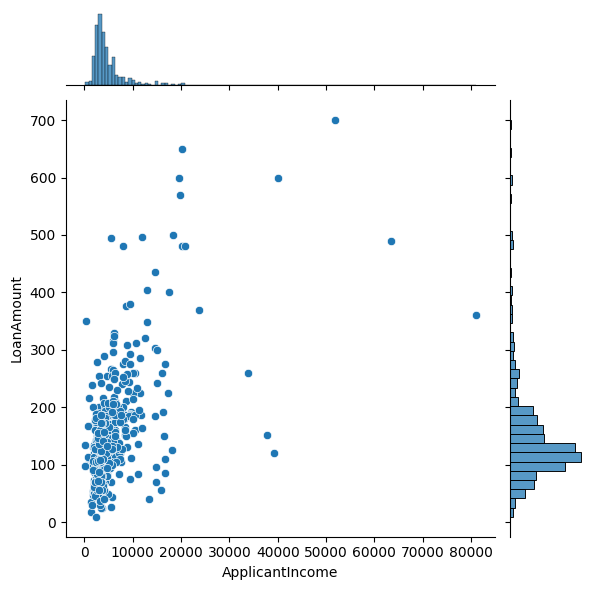

In [ ]:
sns.jointplot(x=df_train['ApplicantIncome'],y=df_train['LoanAmount'])

<Axes: >

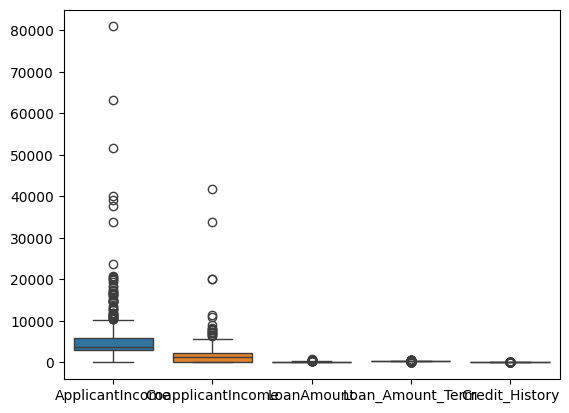

In [ ]:
  sns.boxplot(df_train)

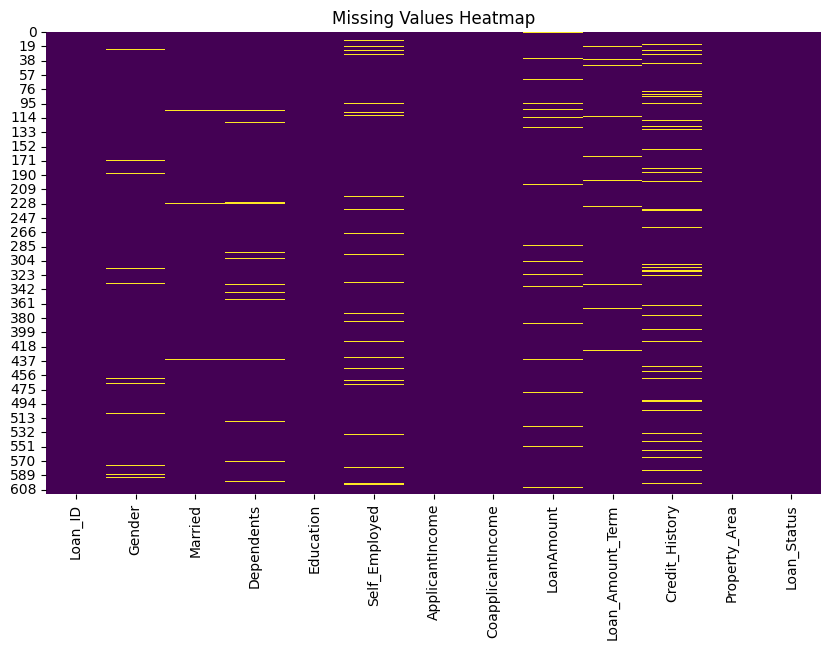

In [ ]:
# Heatmap for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

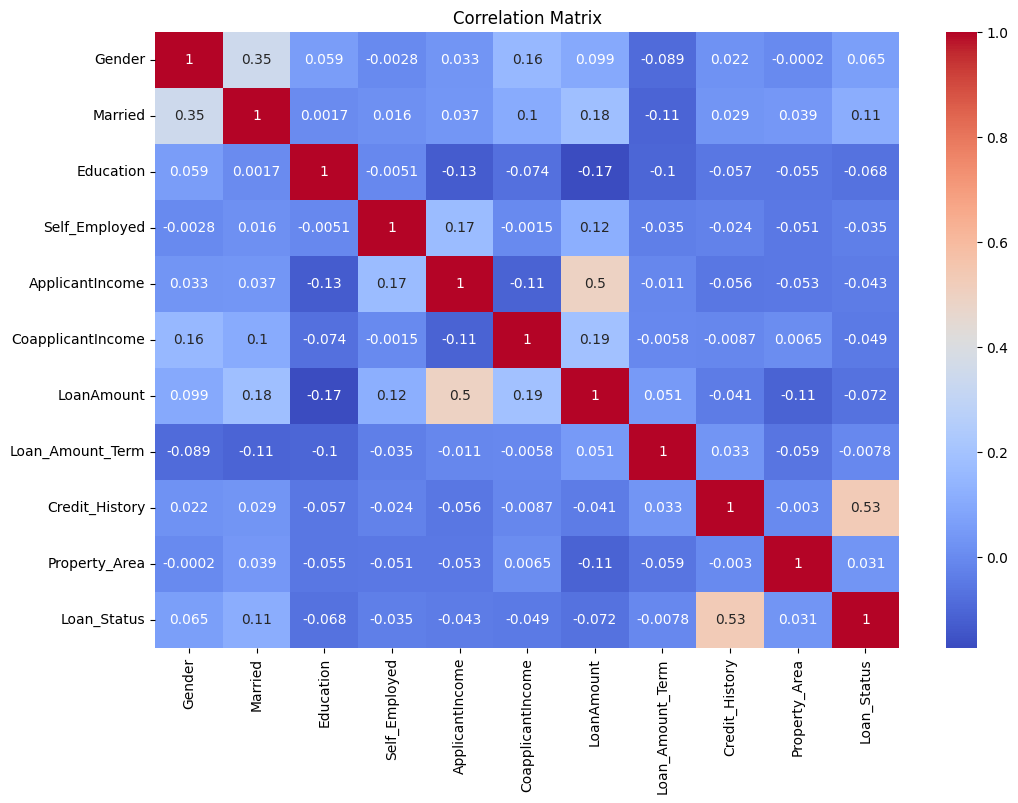

In [ ]:
# Data Preprocessing
# Drop rows with missing values
df_train = df_train.dropna()

# Encode categorical variables
lb = LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df_train[column] = lb.fit_transform(df_train[column])

# Convert numerical columns to integers
df_train['LoanAmount'] = df_train['LoanAmount'].apply(np.int64)
df_train['CoapplicantIncome'] = df_train['CoapplicantIncome'].apply(np.int64)
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].apply(np.int64)
df_train['Credit_History'] = df_train['Credit_History'].apply(np.int64)

# Drop unnecessary columns
df_train = df_train.drop(['Dependents', 'Loan_ID'], axis=1)

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Feature Selection
# Drop less relevant features
df_train = df_train.drop(['Loan_Amount_Term', 'Gender', 'Education', 'Married'], axis=1)

# Define features (X) and target (y)
X = df_train.drop('Loan_Status', axis=1)
y = df_train['Loan_Status']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:

# Assuming X and y are the features and target variable from preprocessed data

# Standardizing the data (recommended for Logistic Regression and SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)

# Initialize a dictionary to store model results
model_results = {}

# 1. Decision Tree Classifier
tree = DecisionTreeClassifier(criterion='gini', random_state=101)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, pred_tree))
model_results['Decision Tree'] = accuracy_score(y_test, pred_tree)

# 2. Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=101)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, pred_rfc))
model_results['Random Forest'] = accuracy_score(y_test, pred_rfc)

# 3. Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=101)  # Added max_iter for convergence
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, pred_lr))
model_results['Logistic Regression'] = accuracy_score(y_test, pred_lr)

# 4. Support Vector Machine (SVM)
svc = SVC(kernel='poly', C=1, random_state=101)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, pred_svc))
model_results['SVM'] = accuracy_score(y_test, pred_svc)

# Print Model Accuracy Results
print("\nModel Accuracy Summary:")
for model, accuracy in model_results.items():
    print(f"{model}: {accuracy:.2%}")


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.50      0.49        44
           1       0.78      0.77      0.77       100

    accuracy                           0.69       144
   macro avg       0.63      0.64      0.63       144
weighted avg       0.69      0.69      0.69       144


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.39      0.47        44
           1       0.77      0.89      0.82       100

    accuracy                           0.74       144
   macro avg       0.69      0.64      0.65       144
weighted avg       0.72      0.74      0.72       144


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.34      0.48        44
           1       0.77      0.97      0.86       100

    accuracy                           0.78       144
   macro 

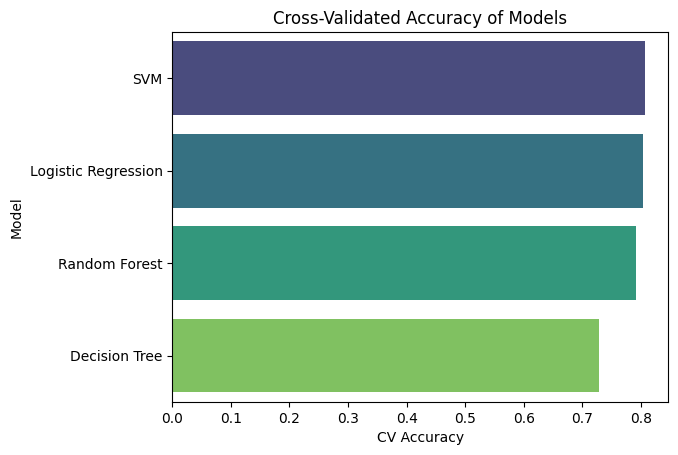

In [ ]:
# Model Comparison
models = {
    'Decision Tree': tree,
    'Random Forest': rfc,
    'Logistic Regression': lr,
    'SVM': svc
}

# Cross-validation scores
cv_scores = []
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores.append((name, np.mean(scores)))

cv_df = pd.DataFrame(cv_scores, columns=['Model', 'CV Accuracy'])
sns.barplot(x='CV Accuracy', y='Model', data=cv_df.sort_values(by='CV Accuracy', ascending=False), palette='viridis')
plt.title('Cross-Validated Accuracy of Models')
plt.show()


Cluster Analysis Summary:
         Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Cluster                                                                  
0                0.000        4307.3925           1556.475    131.7450   
1                0.825       10648.4250           1704.175    209.6875   

         Credit_History  Property_Area  Loan_Status  
Cluster                                              
0                 0.860         1.0525         0.71  
1                 0.825         0.8750         0.60  


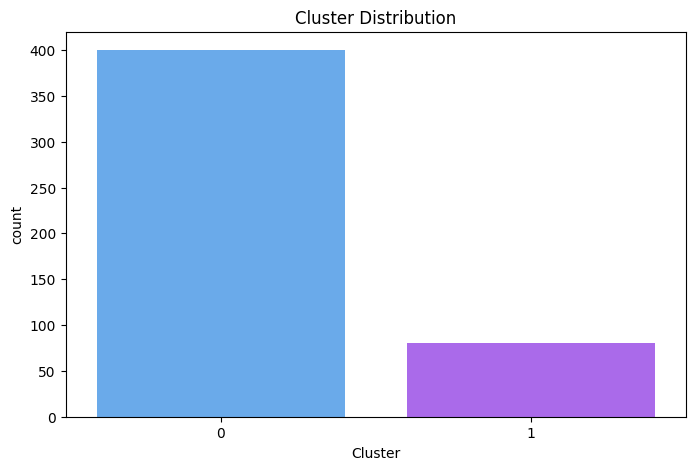

In [ ]:
# Clustering
clusterer = KMeans(n_clusters=2, init='k-means++', random_state=101)
clusterer.fit(X)
cluster_labels = clusterer.labels_

# Add cluster labels to data
df_train['Cluster'] = cluster_labels
cluster_summary = df_train.groupby('Cluster').mean()
print("Cluster Analysis Summary:")
print(cluster_summary)

plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=df_train, palette='cool')
plt.title('Cluster Distribution')
plt.show()
